## 第十章 聚类
* https://blog.csdn.net/leonliu1995/article/details/78944798 (K-means、DBSCAN、层次聚类)
* https://blog.csdn.net/qq_27825451/article/details/94436488  (聚类模型评价指标)

### 一、聚类算法概述

* 物以类聚，人以群分，聚类分析是一种重要的多变量统计方法，但记住其实它是一种数据分析方法，不能进行统计推断的。当然，聚类分析主要应用在市场细分等领域，也经常采用聚类分析技术来实现对抽样框的分层。
* 常用聚类方法：K-maeas聚类、密度聚类方法DBSCAN、层次聚类，现在还有许多新的好的聚类方法。
* K-maeas聚类能把所有点都分在一个类中。密度聚类时会出现有的点不在任何一个簇中，正好用这个特点可以做奇异点检测，即不能聚到任何一个类别中的点看成奇异点。
* 重要说明：由于方法用到了距离，而且距离值直接影响到聚类效果，因此在聚类前必须对每一个特征数据进行标准化或归一化处理。
* 聚类效果或目标：使得类内距离尽可能小，类间距离尽可能大。

### 二、K-means聚类分析
#### 1.算法（可调超参数是k值和哪种距离）
* 方法步骤：(详见周志华机器学习书)
* (1)首先确定要分成m类.
* (2)随机取m个样本点作为初始中心点。
* (3)计算每个样本点距离这m个中心点的距离，离哪一个中心点近，就属于哪一个类别。
* (4)分成m簇后，重新计算新的中心点，此时中心点可能不是样本点。
* (5)转到(3)直到当前所有中心点不再更新。
![caption](./data_picture/chapter9/jlt1.png)

#### ２.算法优缺点
* 优点：原理简单，实现容易
* 缺点  
(1)对于离群点和孤立点敏感；   
(2)k值选择;   
(3)计算量大。   
(4)只能发现球状簇。   
![caption](./data_picture/chapter9/jlt2.png)

#### 3.算法实现（python代码）

In [9]:
%matplotlib inline
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

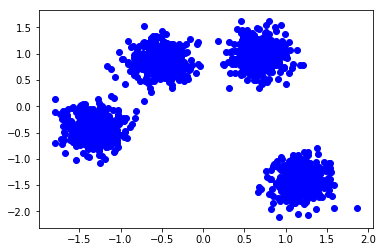

In [26]:
#1.利用make_blobs函数生成平面数据点
from sklearn.datasets import make_blobs   #生成数据函数  
n_samples =1500  
X,y = make_blobs(n_samples=n_samples,centers=4,random_state=170)  
X = StandardScaler().fit_transform(X)  #标准化
plt.scatter(X[:,0],X[:,1],c='b')  

In [28]:
#2.聚类模型训练
Kmeans=KMeans(n_clusters=4,random_state=170)  #生成实体类
Kmeans.fit(X)

#打印显示聚类结果
print('各个点的类别')
print(Kmeans.labels_)  #各点类别，从0开始的整数，有几簇就有几个不同的整数，返回一维数组    
print('各簇中心：')
print(Kmeans.cluster_centers_)  #分完簇后各簇的中心点坐标，返回二维数组 

#聚类结果保存为文件
my_data=pd.DataFrame(X,columns=['横坐标','纵坐标'])
my_data['聚类结果']=Kmeans.labels_
my_data.to_csv('km_result.csv')

各个点的类别
[3 0 2 ... 1 1 1]
各簇中心：
[[ 0.67295932  0.96426751]
 [ 1.17916514 -1.40717298]
 [-1.31999887 -0.40826996]
 [-0.5321256   0.85117543]]


In [18]:
#3.聚类模型评估
score=Kmeans.score(X) #各训练样本到其所属中心点的距离总和的负值,绝对值越大,聚类效果越不好  
print('score=',score)
#反映同类样本类内平均距离尽可能小，类间距离尽可能大的指标。取值范围在[-1,1]之间，越大越好
labels = Kmeans.labels_
pgjg1=metrics.silhouette_score(X, labels, metric='euclidean')   #轮廓系数
print('聚类结果的轮廓系数=',pgjg1)
print('-----------------------------------------------')

score= -123.7533951813662
聚类结果的轮廓系数= 0.7528651958435336
-----------------------------------------------


#### 轮廓系数意义
* 轮廓系数(Silhouette Coefficient)是为每个样本定义的，由两个得分组成:  
a: 某个样本与同一类别中所有其他点之间的平均距离。  
b: 该样本与下一个距离最近的簇中的所有其他点之间的平均距离。  
单个样本的轮廓系数(Silhouette Coefficient)为: s=(b−a)/max(a,b)  
一组样本的轮廓系数(Silhouette Coefficient)为:每个样本的 Silhouette 系数的平均值。  

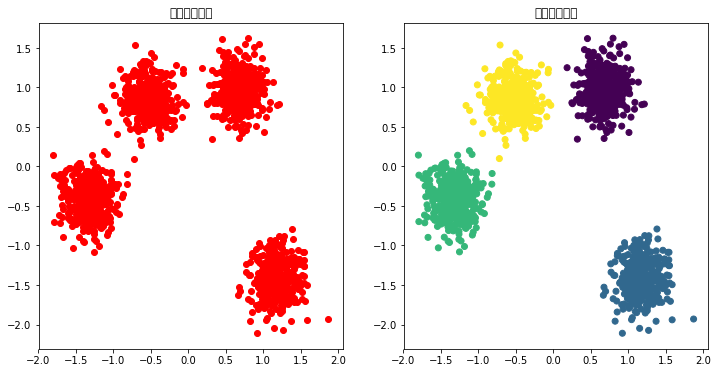

In [10]:
#3.聚类效果可视化
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1],c='b') 
plt.title("聚类前数据图")  
plt.subplot(122)  
plt.scatter(X[:,0],X[:,1],c=Kmeans.labels_)  
plt.title("聚类后数据图")  
plt.show()


### 三、DBSCAN聚类（密度聚类）（没有predict方法）

#### 1.算法（可调超参数是ε、MinPts值、哪种距离）
* 算法伪代码以及实现如下：
* (1)根据ε和MinPts的值，先从样本集D中找到一个核心点p（高密度点），并建立新簇C（p点放入此簇C中）。
* (2)然后以此核心点p为基础，查找出其直接密度可达的点，并将这些点放入点集N（包括其自身）。
* (3)对点集N中的所有点进行遍历：将这些点放入簇C中，对每个点进行邻域分析——对于核心点q（高密度点),将其直接邻域可达（p点间接邻域可达）的点，纳入到点集N中；对于非核心点（边界点或噪声）q，此时因为它是p点可达的(直接或间接)，因此它将变成C的边界点，非噪声。
* (4)重复上述过程3直到完成簇C的构建。注意:上述归入到簇C的点均将设置为已被访问，因为这些点均是核心点或边界点，类型明确！
* (5)对于样本集中未访问到的点(对于簇C而言是噪声点)，重复上述1—4过程，直到所有点均被遍历/访问到。
* 注：密度聚类方法可用于异常点检测，即没有归到任何一类的点就是奇异点。
![caption](./data_picture/chapter9/jlt3.png)

#### ２.算法优缺点
* 优点：
* (1)与K-means方法相比，DBSCAN不需要事先知道要形成的簇类的数量。
* (2)对噪声不敏感。这是因为该算法能够较好地判断离群点，并且即使错判离群点，对最终的聚类结果也没什么影响
* (3)能发现任意形状的簇。这是因为DBSCAN 是靠不断连接邻域呢高密度点来发现簇的，只需要定义邻域大小和密度阈值，因此可以发现不同形状，不同大小的簇
* 缺点：
* (1)对两个参数的设置敏感，即圈的半径 eps 、阈值 MinPts。
* (2)DBSCAN 使用固定的参数识别聚类。显然，当聚类的稀疏程度不同，聚类效果也有很大不同。即数据密度不均匀时，很难使用该算法
* (3)如果数据样本集越大，收敛时间越长。此时可以使用 KD 树优化

#### 3.算法实现（python代码）

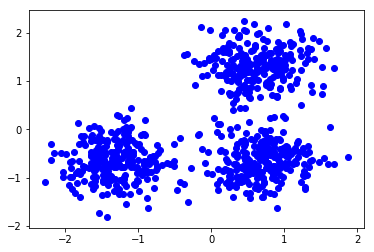

In [33]:
import numpy as np  
%matplotlib inline
import matplotlib.pyplot as plt  
import pandas as pd  
from sklearn.cluster import DBSCAN  
from sklearn import metrics  
from sklearn.datasets  import make_blobs  
from sklearn.preprocessing import StandardScaler  
  
#1.生成数据  
centers = [[1,1],[-1,-1],[1,-1]]  #三个中心点生成三类数据
#下边函数中centers可以取整数表示取几个中心点来生成数据，也可以直接取三个中心点坐标。
X,labels_true = make_blobs(n_samples=750,centers=centers,cluster_std=0.4,random_state=0)
X = StandardScaler().fit_transform(X)  #对数据进行标准化 
plt.scatter(X[:,0],X[:,1],c='b') 

In [36]:
#2.密度聚类
#eps:半径，min_samples：某点为中心eps为半径的领域内如果有大于等于min_samples个样本点，则该点为核心点。
db = DBSCAN(eps=0.3,min_samples=10)
db.fit(X)
labels = db.labels_    #标签值为-1的点为噪声或奇异点,不属于任何一类。
#--------------------------------------

In [37]:
#3.聚类模型评估（轮廓系数法）
#反映同类样本类内平均距离尽可能小，类间距离尽可能大的指标。取值范围在[-1,1]之间，越大越好
labels = db.labels_
pgjg=metrics.silhouette_score(X, labels, metric='euclidean')
print('聚类结果的轮廓系数=',pgjg)

聚类结果的轮廓系数= 0.6255247640253795


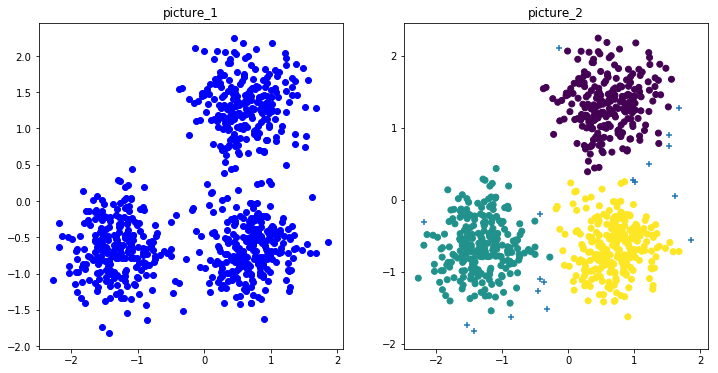

In [38]:
#4.密度聚类效果可视化
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1],c='b') 
plt.title("picture_1")  
plt.subplot(122)  
plt.scatter(X[labels!=-1,0],X[labels!=-1,1],c=labels[labels!=-1]) #显示聚类了的点
plt.scatter(X[labels==-1,0],X[labels==-1,1],marker='+')   #奇异点标注为+
plt.title("picture_2")  
plt.show()

#### 4.密度聚类和KMeans聚类在一类数据点下的聚类效果比较。
* 下边的数据点分布图用KMeans聚类是不可能分出来的，但密度聚类都够分开。
* 但密度聚类的轮廓系数远低于Kmeans的轮廓系数，所以不能把轮廓系数作为唯一指标，应该还得考虑其他评估指标

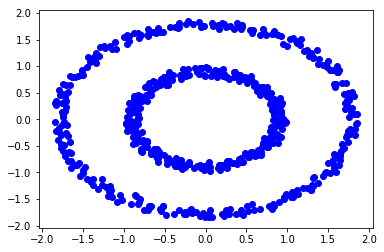

In [43]:
import numpy as np  
%matplotlib inline
import matplotlib.pyplot as plt  
  
from sklearn.cluster import DBSCAN,KMeans
from sklearn import metrics   
from sklearn.preprocessing import StandardScaler  
  
#1.生成数据  
n_samples=300
X1=np.zeros((n_samples,2))
X2=np.zeros((n_samples,2))
R=10
r=5
Sita=2*np.pi/n_samples
for i in range(n_samples):
    X1[i,0]=R*np.cos(i*Sita)+np.random.random()
    X1[i,1]=R*np.sin(i*Sita)+np.random.random()
for i in range(n_samples):
    X2[i,0]=r*np.cos(i*Sita)+np.random.random()
    X2[i,1]=r*np.sin(i*Sita)+np.random.random()
X=np.r_[(X1,X2)]

#2.对数据进行标准化  
X = StandardScaler().fit_transform(X)  #标准化
plt.scatter(X[:,0],X[:,1],c='b')  


Kmeans聚类结果的轮廓系数= 0.38965142897760935
密度聚类结果的轮廓系数= 0.11488123925098646


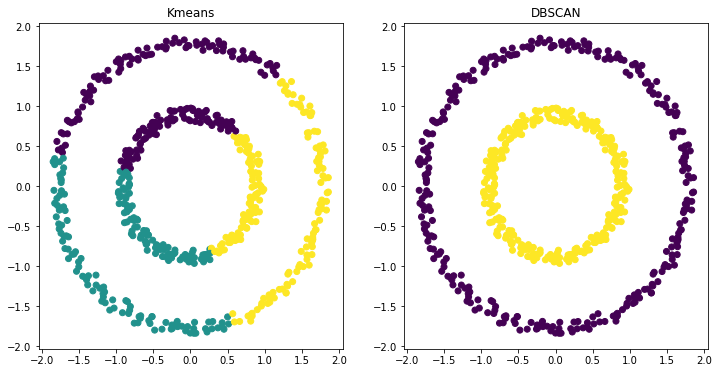

In [44]:
#3.KMeans聚类模型训练
Kmeans=KMeans(n_clusters=3,random_state=170)  #生成实体类
Kmeans.fit(X)
labels = Kmeans.labels_
pgjg=metrics.silhouette_score(X, labels, metric='euclidean')
print('Kmeans聚类结果的轮廓系数=',pgjg)

#聚类可视化
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1],c=Kmeans.labels_)  
plt.title("Kmeans")  

#4.密度聚类模型训练
db = DBSCAN(eps=0.3,min_samples=10)
db.fit(X)  
labels = db.labels_    #标签值为-1的点为噪声或奇异点。
pgjg=metrics.silhouette_score(X, labels, metric='euclidean')
print('密度聚类结果的轮廓系数=',pgjg)

#聚类效果可视化
plt.subplot(122)  
plt.scatter(X[labels!=-1,0],X[labels!=-1,1],c=labels[labels!=-1]) #显示聚类了的点
plt.scatter(X[labels==-1,0],X[labels==-1,1],marker='+')   #奇异点标注为+
plt.title("DBSCAN")  
plt.show()

* 从上边图像看到。密度聚类比Kmeans好，但密度聚类的轮廓系数远低于Kmeans的轮廓系数，所以不能把轮廓系数作为唯一指标，应该还得考虑其他评估指标

### 四、层次聚类（Hierarchical clustering）  
　　层次聚类就是一层一层的进行聚类，可以由上向下把大的类别（cluster）分割，叫作分裂法；也可以由下向上对小的类别进行聚合，叫作凝聚法；但是一般用的比较多的是由下向上的凝聚方法。  
　　分裂法指的是初始时将所有的样本归为一个类簇，然后依据某种准则进行逐渐的分裂，直到达到某种条件或者达到设定的分类数目。  
　　凝聚法指的是初始时将每个样本点当做一个类簇，所以原始类簇的大小等于样本点的个数，然后依据某种准则合并这些初始的类簇，直到达到某种条件或者达到设定的分类数目。  

#### 1.算法（可调超参数是k值和选择哪种距离）
*（1）分裂法（自上而下） （此方法的那个函数在sklearn中已经变为私有，不能免费调用了） 
1.将样本集中的所有的样本归为一个类簇；  
repeat：  
　2.在同一个类簇（计为c）中计算两两样本之间的距离，找出距离最远的两个样本a,b；  
　3.将样本a，b分配到不同的类簇c1和c2中；  
　4.计算原类簇（c）中剩余的其他样本点和a，b的距离，若是dis(a)<dis(b)，则将样本点归到c1中，否则归到c2中；  
util： 达到聚类的数目或者达到设定的条件  

*（2）凝聚法：（例子中是这个方法）  
1.将样本集中的所有的样本点都当做一个独立的类簇；  
repeat：  
　2.计算两两类簇之间的距离（后边会做介绍），找到距离最小的两个类簇c1和c2；  
　3.合并类簇c1和c2为一个类簇；  
util： 达到聚类的数目或者达到设定的条件  

![caption](./data_picture/chapter9/jlt4.png)

#### ２.算法优缺点
* 优点：
* (1)距离和规则的相似度容易定义，限制少；
* (2)不需要预先制定聚类数；
* (3)可以发现类的层次关系
* (4)可以聚类成其它形状  
  
* 缺点：
* (1)计算复杂度太高；
* (2)奇异值也能产生很大影响；
* (3)算法很可能聚类成链状

#### 3.算法实现（python代码）

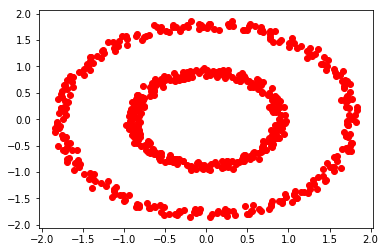

In [46]:
import numpy as np  
%matplotlib inline
import matplotlib.pyplot as plt  
  
from sklearn.cluster import AgglomerativeClustering  #导入凝聚式聚类函数  
from sklearn import metrics   
from sklearn.preprocessing import StandardScaler  
  
#1.生成数据  
n_samples=300
X1=np.zeros((n_samples,2))
X2=np.zeros((n_samples,2))
R=10
r=5
Sita=2*np.pi/n_samples
for i in range(n_samples):
    X1[i,0]=R*np.cos(i*Sita)+np.random.random()
    X1[i,1]=R*np.sin(i*Sita)+np.random.random()
for i in range(n_samples):
    X2[i,0]=r*np.cos(i*Sita)+np.random.random()
    X2[i,1]=r*np.sin(i*Sita)+np.random.random()
X=np.r_[(X1,X2)]

#2.对数据进行标准化  
X = StandardScaler().fit_transform(X)  
plt.scatter(X[:,0],X[:,1],c='r')  

层次聚类结果的轮廓系数= 0.32938450583065115
密度聚类结果的轮廓系数= 0.1154069879302186


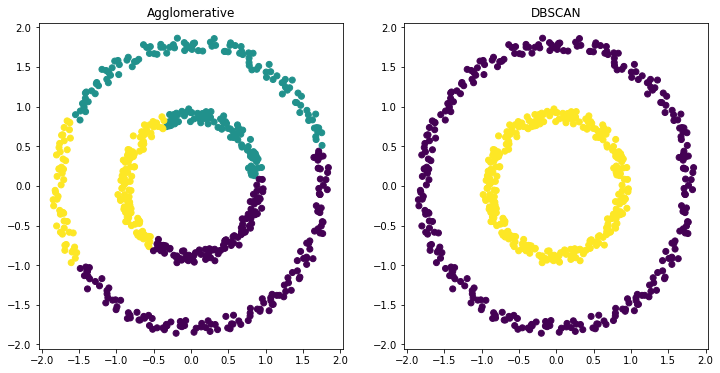

In [48]:
#3.层次聚类模型训练
model=AgglomerativeClustering(n_clusters=3)  #生成实体类
model.fit(X)
labels = model.labels_
pgjg=metrics.silhouette_score(X, labels, metric='euclidean')
print('层次聚类结果的轮廓系数=',pgjg)

#聚类可视化
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1],c=model.labels_)  
plt.title("Agglomerative")  

#4.密度聚类模型训练
db = DBSCAN(eps=0.3,min_samples=10)
db.fit(X)  
labels = db.labels_    #标签值为-1的点为噪声或奇异点。
pgjg=metrics.silhouette_score(X, labels, metric='euclidean')
print('密度聚类结果的轮廓系数=',pgjg)

#聚类效果可视化
plt.subplot(122)  
plt.scatter(X[labels!=-1,0],X[labels!=-1,1],c=labels[labels!=-1]) #显示聚类了的点
plt.scatter(X[labels==-1,0],X[labels==-1,1],marker='+')   #奇异点标注为+
plt.title("DBSCAN")  
plt.show()

### 五、聚类方法性能评估指标说明  
https://blog.csdn.net/u010159842/article/details/78624135    
https://blog.csdn.net/dkjkls/article/details/80189476   

#### 1. 无类别信息聚类评估（也是最常用的）
* 方法1：轮廓系数法

In [11]:
#反映同类样本类内平均距离尽可能小，类间距离尽可能大的指标。取值范围在[-1,1]之间，越大越好
#轮廓系数=0.69也不错了，相当于准确率是[0.69-(-1)]/[1-(-1)]=1.69/2
import numpy as np
from sklearn.datasets import make_blobs   #生成数据函数
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#1.利用make_blobs函数生成平面数据点
n_samples = 1500  
X,y = make_blobs(n_samples=n_samples,n_features=2,centers=4,random_state=170)  
X = StandardScaler().fit_transform(X)

#2.聚类并求轮廓系数
Kmeans=KMeans(n_clusters=3,random_state=170)  #生成实体类
Kmeans.fit(X)
labels = Kmeans.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.6958646403390341

* 方法2：Calinski-Harabaz Index方法（速度快）

In [12]:
#反映类别内部数据的协方差和类别之间的协方差的关系，类别内部数据的协方差越小越好，类别之间的协方差越大越好。
#数值越大越好，计算速度比轮廓系数快很多,但这个数值不是百分数，没有上界，不太好衡量聚类效果好坏
import numpy as np
from sklearn.datasets import make_blobs   #生成数据函数
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#利用make_blobs函数生成平面数据点
n_samples = 1500  
X,y = make_blobs(n_samples=n_samples,n_features=2,centers=4,random_state=170)  
X = StandardScaler().fit_transform(X)

#聚类并求Calinski-Harabasz值
Kmeans=KMeans(n_clusters=3,random_state=170)  #生成实体类
Kmeans.fit(X)
labels = Kmeans.labels_
metrics.calinski_harabasz_score(X, labels) 

4914.270780747156

#### 2.有类别信息聚类评估（主要是用来评价聚类方法是否好）
* 方法1：Adjusted Rand index(兰德系数)

In [13]:
#Adjusted Rand index 调整兰德系数，结果在[-1,1]之间，越大越好,超过0就算还不错。
#该方法只要把聚类结果数值化，具体聚类标签的值和已知数据类别标签可以不一致，
#方法主要是识别那些样本对在聚类中是否是一个类别，在数据的已知标签是否是一类
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]
result1=metrics.adjusted_rand_score(labels_true, labels_pred)
print(result1)
#若将labels_pred修改标签值，但聚类结果不变，则最后的聚类兰德系数也不变
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [1, 1, 0, 0, 3, 3]
result2=metrics.adjusted_rand_score(labels_true, labels_pred)
print(result2)

0.24242424242424246
0.24242424242424246


* 方法2:同质性和完整性方法

In [14]:
#方法2:同质性和完整性方法Homogeneity, completeness and V-measure，他们的值介于[0,1]之间。
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

#同质性homogeneity：每个群集只包含单个类的成员
result1=metrics.homogeneity_score(labels_true, labels_pred)  
print(result1)

#完整性completeness：给定类的所有成员都分配给同一个群集
result2=metrics.completeness_score(labels_true, labels_pred) 
print(result2)

#两者的调和平均V-measure：
result3=metrics.v_measure_score(labels_true, labels_pred)    
print(result3)

0.6666666666666669
0.420619835714305
0.5158037429793889


### 六、基于聚类方法的离职职工特点分析

#### 数据背景: 
　　员工离职，似乎已经成为每一家企业都要面对的问题，特别是优秀人才离职的问题会让领导特别头疼。今天我们就通过kaggle上某一家企业员工离职的真实数据来对离职率进行分析建模，并对预测结果显示要离职的员工进行原因分析，并提出挽留优秀员工的合理化建议。  
　　该数据集是指某公司员工的离职数据, 其包含14999个样本以及10个特征, 这10个特征分别为: satisfaction_level(员工对公司满意度), last_evaluation(最新考核评估), number_project(项目数), average_monthly_hours(平均每月工作时长), time_spend_company(工作年限), Work_accident(是否出现工作事故), left(是否离职), promotion_last_5years(过去5年是否升职), department(岗位), salary(薪资水平).

#### 1. 构建随机森林分类器进行分类建模

In [25]:
#1.导入数据
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
data = pd.read_csv('./data_picture/chapter10/HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [26]:
#2.数据预处理

#有大小含义的非数值型特征值数值化，不作为哑变量
salary_mapping = {'low':1,'medium':2,'high':3}  #创造一个映射
data['salary']=data['salary'].map(salary_mapping)  #标签数值化，但不是哑变量

#非数值型特征值数值化，并作为哑变量
data=pd.get_dummies(data, columns=['department'])  #可以指定某几列数值化
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,2,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,2,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,1,0,0,0,0,0,0,0,1,0,0


In [27]:
#3.生成训练集和测试集
from sklearn.model_selection import train_test_split
X = data.drop('left', axis=1)
y = data['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
#4.数据标准化
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

In [29]:
#5.遍历、交叉验证选取最佳随机森林分类器
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_param = {'n_estimators': range(1,11)}   #确定随机森林取几棵树这个超参数
cv = ShuffleSplit(n_splits=20, test_size=0.3)
model = RandomForestClassifier()
rf_grid = GridSearchCV(model, rf_param, cv=cv)
rf_grid.fit(X_train, y_train)
print('随机森林中包含树的最优个数:',rf_grid.best_params_)
print('验证集的准确率', rf_grid.best_score_)

model=rf_grid.best_estimator_
print('测试集的准确率:',model.score(X_test, y_test))
from sklearn.metrics import classification_report
y_predict=model.predict(X_test)
print(classification_report(y_test,y_predict))

随机森林中包含树的最优个数: {'n_estimators': 9}
验证集的准确率 0.984
测试集的准确率: 0.9857777777777778
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3402
           1       0.99      0.96      0.97      1098

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



#### 2.利用构建的随机森林分类器进行影响员工离职的主要因素(特征)选择

In [30]:
#1.利用随机森林分类器选择特征，进行特征降维
features = X.columns
feature_importances = model.feature_importances_   #随机森林训练好的模型包含各特征的重要性这个指标
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score' , inplace=True, ascending=False)
importance_sum=features_df['Importance Score'][:6].sum()
print(importance_sum)
features_df

0.9647914766072677


,Features,Importance Score
0,satisfaction_level,0.352867
2,number_project,0.175226
4,time_spend_company,0.165552
3,average_monthly_hours,0.139233
1,last_evaluation,0.115950
5,Work_accident,0.015964
7,salary,0.013876
15,department_sales,0.003065
17,department_technical,0.002936
16,department_support,0.002806


In [31]:
#2.取前5个主要影响因素(特征)做员工离职聚类
data_value=X[['satisfaction_level','last_evaluation','number_project','average_monthly_hours','time_spend_company']]
target_value=data['left']
X_train,X_test,y_train,y_test=train_test_split(data_value,target_value,test_size=0.30,random_state=33)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3388
           1       0.99      0.96      0.97      1112

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



#### 3.基于影响员工离职的主要因素(特征)对离职员工进行聚类分析

In [32]:
#1.抽取包含主要特征的数据
featcher_list=['satisfaction_level','last_evaluation','number_project','average_monthly_hours','time_spend_company','salary']
data_kmeans = data.loc[data.left == 1,featcher_list]
data_kmeans.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,salary
0,0.38,0.53,2,157,3,1
1,0.80,0.86,5,262,6,2
2,0.11,0.88,7,272,4,2
3,0.72,0.87,5,223,5,1
4,0.37,0.52,2,159,3,1


In [33]:
#2.数据标准化
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
#stdsc_kmeans = StandardScaler()
#stdsc_kmeans = MinMaxScaler()
stdsc_kmeans = MaxAbsScaler()  #采取这个标准化方法更合适这个问题，该列的每一个数/abs(xi),xi为该列绝对值最大的那个数
data_kmeans = stdsc_kmeans.fit_transform(data_kmeans)   #返回的data_kmeans是一个array 
data_kmeans=data_kmeans
data_kmeans=pd.DataFrame(data_kmeans,columns=featcher_list)  #转换为DataFrame,以便后边画图

聚类结果的轮廓系数= 0.6200705087796011


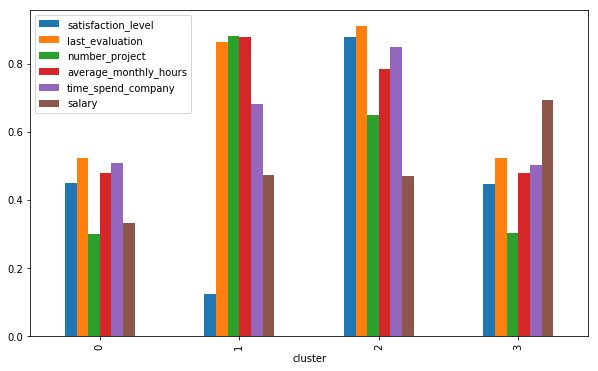

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,salary
cluster,,,,,,
0,0.448917,0.521907,0.300960,0.479998,0.508399,0.333333
1,0.123705,0.862466,0.881727,0.878993,0.681882,0.472193
2,0.878604,0.910620,0.649646,0.784964,0.849862,0.469697
3,0.447594,0.521630,0.302732,0.479705,0.501829,0.692790


In [34]:
#3.聚类
from sklearn.cluster import KMeans
from sklearn import metrics
cluste_number=4
model_kmeans = KMeans(n_clusters =cluste_number, random_state = 0)
model_kmeans.fit(data_kmeans)

pgjg=metrics.silhouette_score(data_kmeans, model_kmeans.labels_, metric='euclidean')
print('聚类结果的轮廓系数=',pgjg)

data_kmeans['cluster']=model_kmeans.labels_
data_kmeans.head()
data_group=data_kmeans.groupby("cluster")[featcher_list].mean()
data_group.plot(kind="bar",figsize=(10,6))  #分组数据有这个画图方法
plt.show()
data_group

* 从上边的条形图可以看到将离职员工分成四组，可以根据四组人员的特点采取相应的办法。

In [29]:
#给出每个类别包含的职工序号
for i in range(cluste_number):
    number_list=list(data_kmeans[model_kmeans.labels_==i].index)
    print('-------------------------------------------------------------------------------------------------------------')
    print('属于第'+str(i)+'组的样本序号为：',number_list)

number_list=list(data_kmeans[model_kmeans.labels_==-1].index)
print('-----------------------------------------------------------------------------------------------------------------')
print('不属于任何一组（离群点）的样本序号为：',number_list)
print('-----------------------------------------------------------------------------------------------------------------')

-------------------------------------------------------------------------------------------------------------
属于第0组的样本序号为： [0, 4, 5, 9, 10, 13, 14, 15, 16, 18, 21, 23, 24, 27, 28, 29, 31, 32, 33, 36, 37, 39, 41, 42, 46, 48, 49, 51, 52, 53, 55, 58, 78, 79, 80, 81, 82, 87, 88, 90, 92, 93, 95, 112, 118, 119, 120, 121, 124, 126, 129, 131, 133, 134, 137, 141, 143, 145, 149, 151, 152, 153, 154, 158, 159, 162, 166, 167, 168, 169, 171, 174, 175, 176, 201, 205, 208, 209, 210, 211, 213, 214, 215, 216, 218, 221, 222, 224, 226, 227, 230, 233, 234, 236, 237, 238, 241, 242, 243, 245, 246, 247, 268, 281, 284, 285, 289, 290, 292, 312, 313, 316, 317, 319, 320, 322, 324, 325, 326, 329, 330, 353, 355, 356, 357, 362, 364, 367, 370, 371, 391, 394, 395, 396, 405, 424, 429, 431, 432, 435, 437, 439, 440, 441, 444, 446, 448, 469, 471, 473, 475, 480, 483, 484, 486, 507, 508, 509, 510, 511, 518, 519, 525, 526, 546, 547, 549, 554, 556, 557, 558, 561, 562, 564, 580, 585, 586, 589, 590, 591, 593, 598, 619, 624, 626